<a href="https://colab.research.google.com/github/raushankumar311/heart-disease-detection/blob/main/colabo/UploadFiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Importing important libraries**

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
import tkinter as tk
from tkinter import filedialog, messagebox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score ,classification_report ,confusion_matrix

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#**2. Create the data frame**

In [6]:
dataset = pd.read_csv('heart.csv')

#**3. Data Exploration and Preprocessing**

In [ ]:
dataset.shape

(1025, 14)

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset = dataset.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        1025 non-null   int64  
 1   sex                        1025 non-null   int64  
 2   chest_pain_type            1025 non-null   int64  
 3   resting_blood_pressure     1025 non-null   int64  
 4   cholesterol                1025 non-null   int64  
 5   fasting_blood_sugar        1025 non-null   int64  
 6   resting_electrocardiogram  1025 non-null   int64  
 7   max_heart_rate_achieved    1025 non-null   int64  
 8   exercise_induced_angina    1025 non-null   int64  
 9   st_depression              1025 non-null   float64
 10  st_slope                   1025 non-null   int64  
 11  num_major_vessels          1025 non-null   int64  
 12  thalassemia                1025 non-null   int64  
 13  target                     1025 non-null   int64

In [ ]:
dataset["target"].describe()

,target
count,1025.000000
mean,0.513171
std,0.500070
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
dataset["target"].unique()

array([0, 1])

In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset['sex'].value_counts()

,count
sex,
1,713
0,312


In [ ]:
dataset['target'].value_counts()

,count
target,
1,526
0,499


In [ ]:
missing_values = dataset.isnull().sum()

missing_values

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholesterol,0
fasting_blood_sugar,0
resting_electrocardiogram,0
max_heart_rate_achieved,0
exercise_induced_angina,0
st_depression,0


#**4. Statistical Analysis**

In [ ]:
mean_values = dataset.mean()
print(mean_values)

age                           54.434146
sex                            0.695610
chest_pain_type                0.942439
resting_blood_pressure       131.611707
cholesterol                  246.000000
fasting_blood_sugar            0.149268
resting_electrocardiogram      0.529756
max_heart_rate_achieved      149.114146
exercise_induced_angina        0.336585
st_depression                  1.071512
st_slope                       1.385366
num_major_vessels              0.754146
thalassemia                    2.323902
target                         0.513171
dtype: float64


In [ ]:
std_dev = dataset.std()
print(std_dev)

age                           9.072290
sex                           0.460373
chest_pain_type               1.029641
resting_blood_pressure       17.516718
cholesterol                  51.592510
fasting_blood_sugar           0.356527
resting_electrocardiogram     0.527878
max_heart_rate_achieved      23.005724
exercise_induced_angina       0.472772
st_depression                 1.175053
st_slope                      0.617755
num_major_vessels             1.030798
thalassemia                   0.620660
target                        0.500070
dtype: float64


In [ ]:
columns = [
    'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
    'fasting_blood_sugar', 'resting_electrocardiogram', 'max_heart_rate_achieved',
    'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia'
]

for col in columns:
    print(f"\nFrequency distribution for {col}:")
    print(dataset[col].value_counts())

print("\nStatistical Summary:")
print(dataset.describe())




Frequency distribution for sex:
sex
1    713
0    312
Name: count, dtype: int64

Frequency distribution for chest_pain_type:
chest_pain_type
0    497
2    284
1    167
3     77
Name: count, dtype: int64

Frequency distribution for resting_blood_pressure:
resting_blood_pressure
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174      3
155      3
172      3
164      3
156      3
101      3
Name: count, dtype: int64

Frequency distribution for cholesterol:
cholesterol
204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141

In [8]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(dataset[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

NameError: name 'columns' is not defined

<Figure size 1800x1200 with 0 Axes>

In [9]:
correlation_matrix = dataset.corr()

correlation_matrix

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
chest_pain_type,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
resting_blood_pressure,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
cholesterol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fasting_blood_sugar,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
resting_electrocardiogram,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
max_heart_rate_achieved,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exercise_induced_angina,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
st_depression,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


#**6. Train-Test Split**

In [10]:
X = dataset.drop(columns=['target'])
Y = dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((820, 13), (205, 13), (820,), (205,))

#**7.Feature Scaling for Model Training**

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(X_train_scaled.shape, X_test_scaled.shape)
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)

Scaled training data shape: (820, 13)
Scaled testing data shape: (205, 13)


#**8. Model Training and Evaluaiton**

**---Logistic Regression---**

In [12]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

In [13]:
Y_pred_lr.shape

(205,)

In [14]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+ str(score_lr) +" %")

The accuracy score achieved using Logistic Regression is: 78.54 %


**---Support Vector Machine---**

In [18]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)

In [19]:
score_svm = round(accuracy_score(Y_pred_svm, Y_test) * 100, 2)
print("The accuracy score achieved using Linear SVM is: " + str(score_svm) + " %")

The accuracy score achieved using Linear SVM is: 80.49 %


**---K Nearest Neighbour---**

Best n_neighbors: 1, Maximum Accuracy: 0.9854


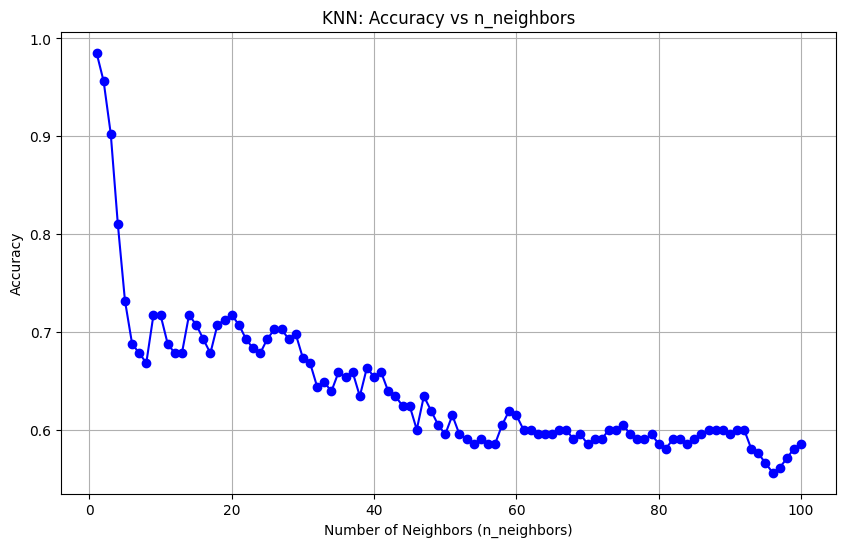

In [20]:
# Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

neighbors = range(1, 101)
accuracies = []

best_n = 1
max_accuracy = 0

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred)
    accuracies.append(acc)

    if acc > max_accuracy:
        max_accuracy = acc
        best_n = n

# Print the best n_neighbors and corresponding accuracy
print(f'Best n_neighbors: {best_n}, Maximum Accuracy: {max_accuracy:.4f}')

# Plotting the accuracy vs n_neighbors graph
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN: Accuracy vs n_neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [21]:
score_knn = round(max_accuracy * 100, 2)
print(f"The maximum accuracy achieved using KNN is: {score_knn} %")

The maximum accuracy achieved using KNN is: 98.54 %


**---Decision Tree---**

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0
best_x = 0  # Initialize to avoid 'undefined variable' issues

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, Y_train)
    Y_pred_dt = dt.predict(X_test)

    # Calculate the current accuracy
    current_accuracy = round(accuracy_score(Y_test, Y_pred_dt) * 100, 2)

    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# Train the best model found during the iteration
print(f"Best Random State: {best_x}, Maximum Accuracy: {max_accuracy}%")
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)

Best Random State: 0, Maximum Accuracy: 98.54%


In [24]:
score_dt = round(accuracy_score(Y_test, Y_pred_dt) * 100, 2)

print(f"Final Accuracy with Best Random State {best_x}: {final_accuracy}%")

Final Accuracy with Best Random State 0: 98.54%


#**Output Final Score**

In [25]:
scores = [score_lr, score_svm, score_knn, score_dt]
algorithms = ["Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 78.54 %
The accuracy score achieved using Support Vector Machine is: 80.49 %
The accuracy score achieved using K-Nearest Neighbors is: 98.54 %
The accuracy score achieved using Decision Tree is: 98.54 %


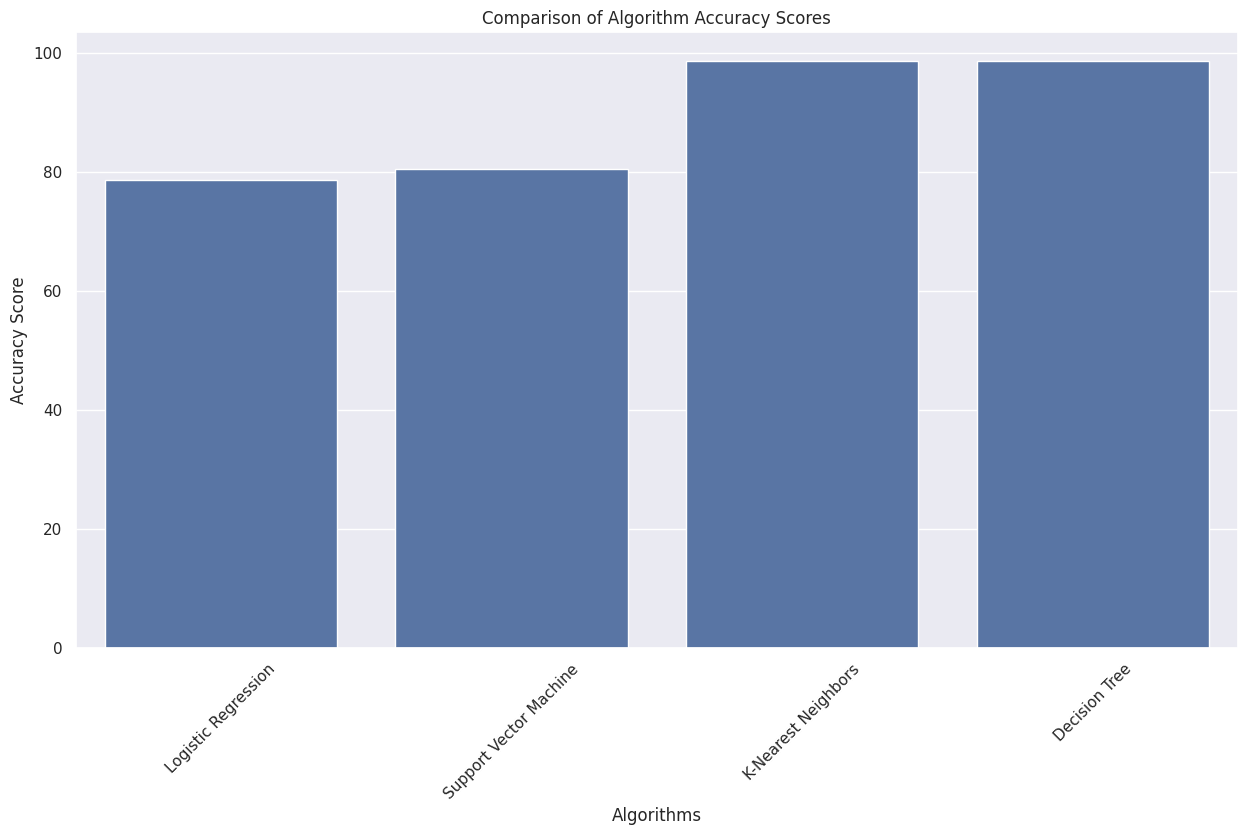

In [26]:
# Create lists of scores and algorithm names
scores = [score_lr, score_svm, score_knn, score_dt]
algorithms = ["Logistic Regression", "Support Vector Machine",
              "K-Nearest Neighbors", "Decision Tree"]

# Create a DataFrame
data = pd.DataFrame({
    'Algorithms': algorithms,
    'Accuracy Score': scores
})

# Set the figure size
sns.set(rc={'figure.figsize': (15, 8)})

# Create the bar plot
sns.barplot(x='Algorithms', y='Accuracy Score', data=data)

# Set labels and title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Algorithm Accuracy Scores")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()